In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy as np
import albumentations as A
from library.dataset import CustomCloudCoverDetection
from albumentations.pytorch import ToTensorV2

In [47]:
tr_ds = CustomCloudCoverDetection(root = './dataset',
                              split = 'train',
                              transforms=A.Compose([A.Normalize(normalization='min_max_per_channel'),
                                                    ToTensorV2()]),
                              download=False)

tt_ds = CustomCloudCoverDetection(root = './dataset',
                              split = 'test',
                              transforms=A.Compose([A.Normalize(normalization='min_max_per_channel'),
                                                    ToTensorV2()]),
                              download=False)

len(tr_ds), len(tt_ds)

(230, 215)

# Statistics

In [42]:
tr_df = tr_ds.metadata.sort_values('chip_id')
tr_df.head()

,chip_id,location,datetime,cloudpath
0,aewm,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aewm
1,afxz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/afxz
2,agex,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agex
3,agtu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agtu
4,ahtj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/ahtj


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

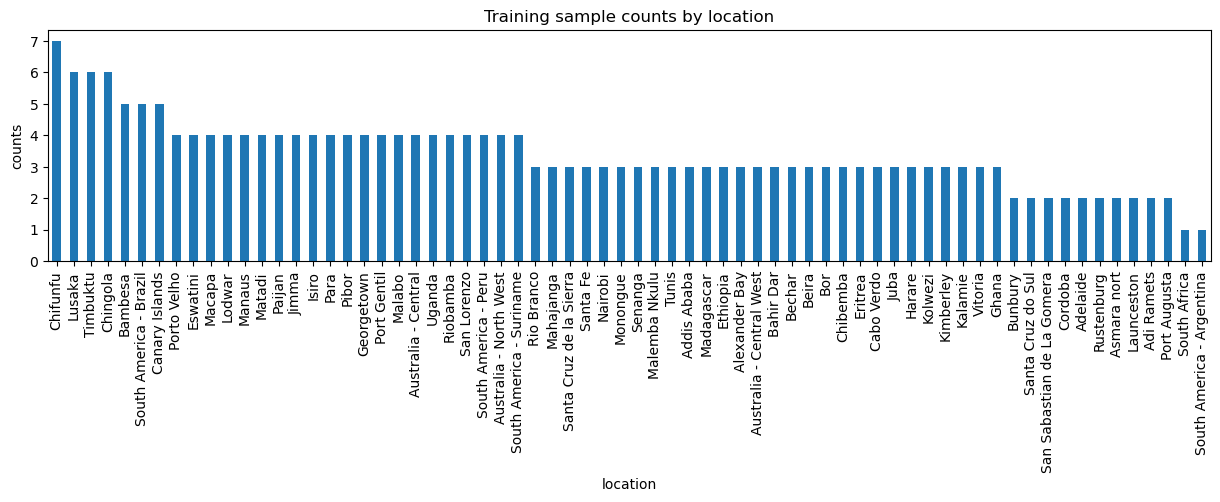

In [43]:
tr_df_by_loc = tr_df.groupby('location').count()
tr_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Training sample counts by location')

In [44]:
tt_df = tt_ds.metadata.sort_values('chip_id')
tt_df.head()


,chip_id,location,datetime
0,abft,Australia - Central East,2020-06-03T00:55:26Z
1,adgb,Australia - Central East,2020-06-03T00:55:26Z
2,advd,Australia - Central East,2020-06-03T00:55:26Z
3,awhj,Luanda,2020-09-07T09:33:08Z
4,axel,Luanda,2020-09-07T09:33:08Z


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

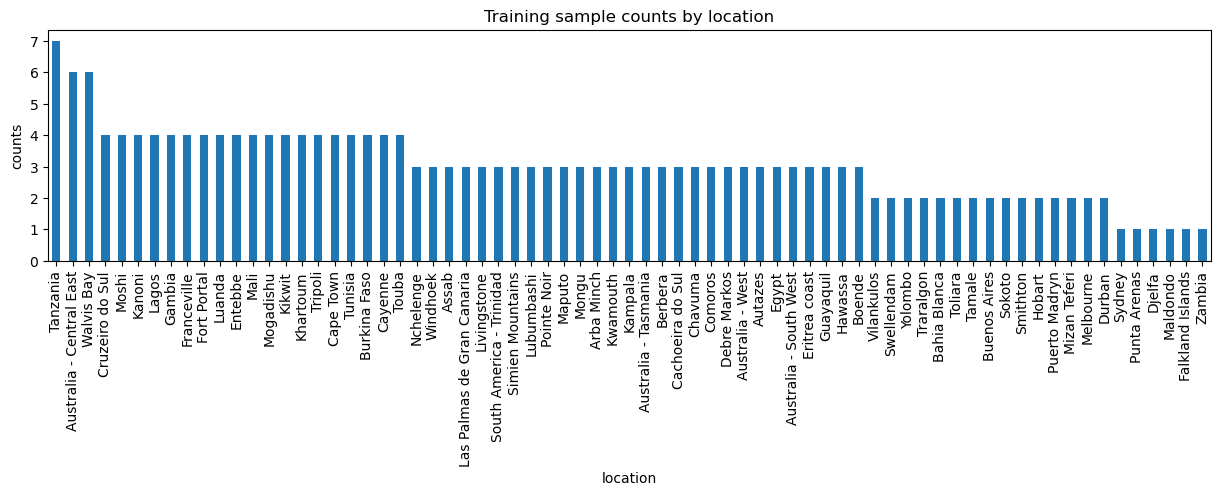

In [45]:
tt_df_by_loc = tt_df.groupby('location').count()
tt_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Training sample counts by location')

# Visualization

aqda
wamb
vwvu


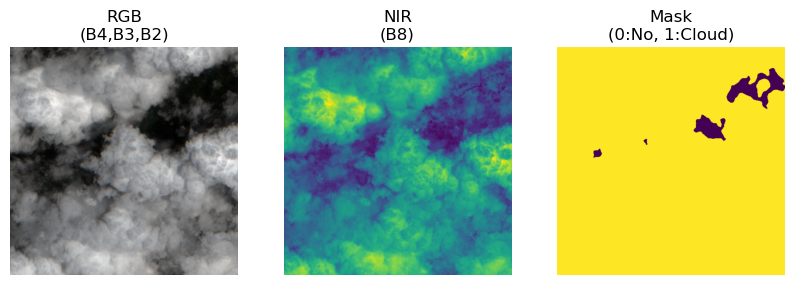

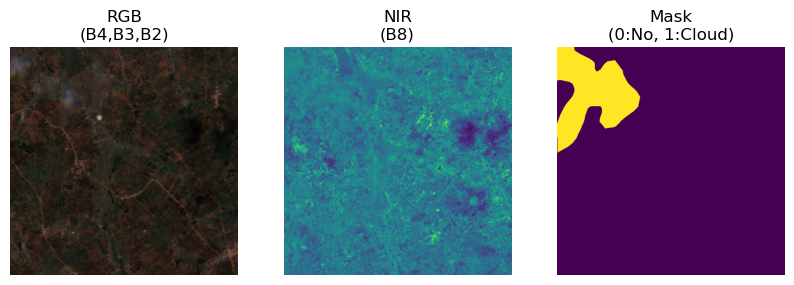

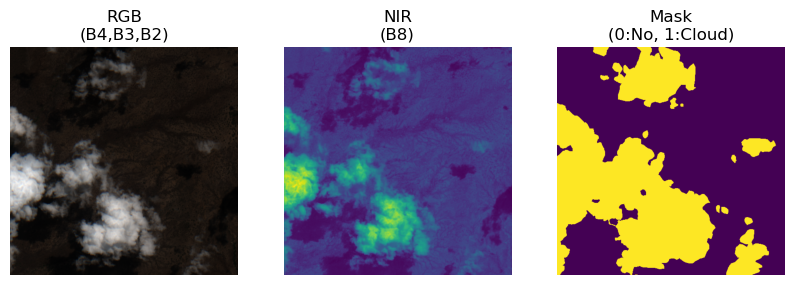

In [54]:
idxs = np.random.randint(0, len(tr_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(tr_ds.metadata.loc[idx,'chip_id'])
    tr_ds.plot(tr_ds[idx])

odyg
jylu
zrtj


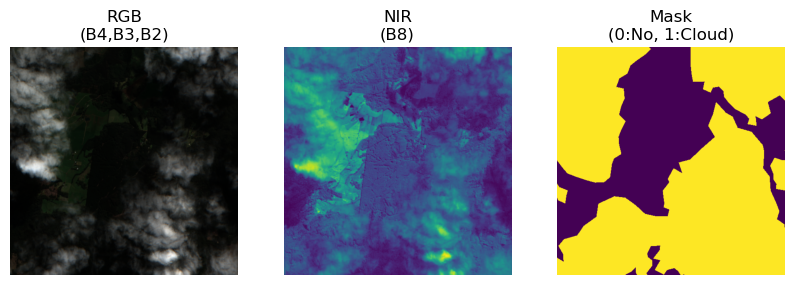

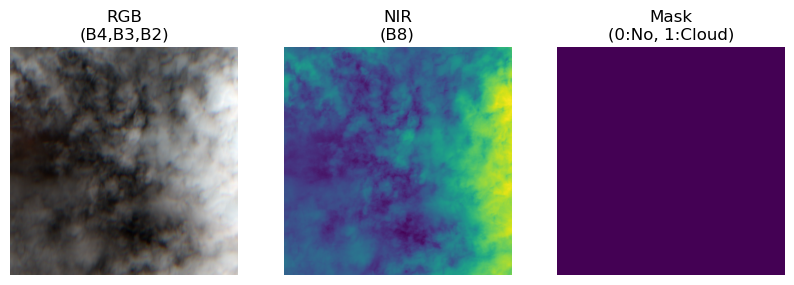

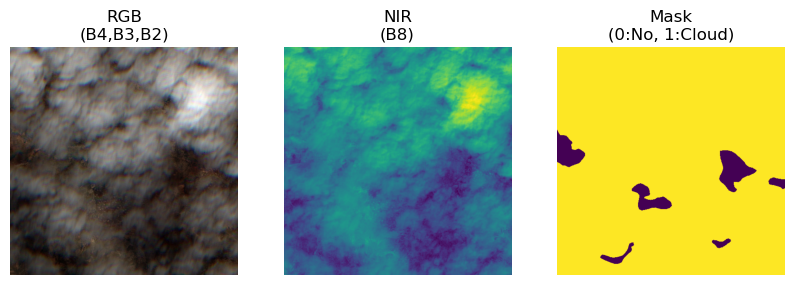

In [55]:
idxs = np.random.randint(0, len(tt_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(tt_ds.metadata.loc[idx,'chip_id'])
    tt_ds.plot(tt_ds[idx])